In [22]:
# !pip install keras
# !pip install tensorflow

In [36]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras as keras
from keras import layers
from random import randrange
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
DATA_PATH = "Dataset Development/data_points.csv"
data = pd.read_csv(DATA_PATH)
print(data)

             x         y         t        vY        vX  vXinitial  vYinitial
0     0.096230 -0.006234  0.033333 -0.187031  2.886889   1.509056   0.124688
1     0.212143 -0.019742  0.066667 -0.405234  3.477389   1.509056   0.124688
2     0.330243 -0.039831  0.100000 -0.602656  3.543000   1.509056   0.124688
3     0.449436 -0.066500  0.133333 -0.800078  3.575806   1.509056   0.124688
4     0.571910 -0.100443  0.166667 -1.018281  3.674222   1.509056   0.124688
...        ...       ...       ...       ...       ...        ...        ...
2626  0.151999 -0.090398  0.066667 -1.454688  2.329194   2.165167  -0.997500
2627  0.232919 -0.144776  0.100000 -1.631328  2.427611   2.165167  -0.997500
2628  0.077640 -0.048490  0.033333 -1.454688  2.329194   2.230778  -1.257266
2629  0.158560 -0.102867  0.066667 -1.631328  2.427611   2.230778  -1.257266
2630  0.080920 -0.054378  0.033333 -1.631328  2.427611   2.329194  -1.454688

[2631 rows x 7 columns]


In [25]:
X = data.loc[:,["t", "vXinitial", "vYinitial"]]
Y = data["y"]

In [26]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
model = keras.Sequential()

model.add(layers.Embedding(input_dim=3, output_dim=1))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
58/58 [==============================] - 4s 16ms/step - loss: -0.7429 - accuracy: 0.0000e+00 - val_loss: -0.8441 - val_accuracy: 0.0000e+00
Epoch 2/100
58/58 [==============================] - 0s 7ms/step - loss: -0.7697 - accuracy: 0.0000e+00 - val_loss: -0.8441 - val_accuracy: 0.0000e+00
Epoch 3/100
58/58 [==============================] - 0s 7ms/step - loss: -0.8260 - accuracy: 0.0000e+00 - val_loss: -0.8441 - val_accuracy: 0.0000e+00
Epoch 4/100
58/58 [==============================] - 0s 7ms/step - loss: -0.8155 - accuracy: 0.0000e+00 - val_loss: -0.8441 - val_accuracy: 0.0000e+00
Epoch 5/100
58/58 [==============================] - 0s 7ms/step - loss: -0.7988 - accuracy: 0.0000e+00 - val_loss: -0.8441 - val_accuracy: 0.0000e+00
Epoch 6/100
58/58 [==============================] - 0s 7ms/step - loss: -0.7980 - accuracy: 0.0000e+00 - val_loss: -0.8441 - val_accuracy: 0.0000e+00
Epoch 7/100
58/58 [==============================] - 0s 7ms/step - loss: -0.8135 - accuracy: 

t            0.100000
vXinitial    0.820139
vYinitial    1.122187
Name: 1879, dtype: float64


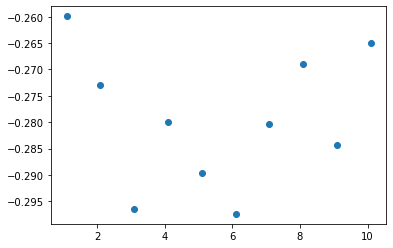

In [38]:
################# TEST #################
test_index = randrange(data.shape[0])
test_point = data.loc[:,["t", "vXinitial", "vYinitial"]].iloc[test_index]

print(test_point)

test_points = {}

for i in range(10):
    test_point["t"] = test_point["t"] + 1
    test_y = model.predict((tuple(test_point),))[0][0]
    
    test_points[test_point["t"]] = test_y

plt.scatter([t for t in test_points.keys()], [y for y in test_points.values()])
plt.show()